# Project 9 – Data Engineering

Κωνσταντίνα Μαρίνα Μπλέτσα, ΑΕΜ:243

# Ερώτημα 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap.umap_ as umap

In [ ]:
df = pd.read_csv("bankloan.csv")
df.head()

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0.0,0.0,52303.0,41000.0,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0.0,332.0,175731.0,13100.0,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0.0,0.0,202012.0,16300.0,NaN,1.0,0.0
3,4.0,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,...,INDIVIDUAL,NaN,NaN,0.0,0.0,108235.0,34750.0,NaN,1.0,0.0
4,5.0,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,...,INDIVIDUAL,NaN,NaN,0.0,0.0,45492.0,14100.0,NaN,1.0,0.0


In [ ]:
df.describe(include='all')

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
count,368.000000,1.137550e+05,1.137550e+05,113755.000000,113755.000000,113755,113755.000000,113755.000000,113755,113755,...,113754,441.000000,439.000000,113754.000000,113754.000000,1.137540e+05,113754.000000,0.0,511.000000,511.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,76922,NaN,NaN,34374,7316,...,113313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,184.500000,6.388497e+07,6.831424e+07,15089.744407,15089.744407,NaN,12.294920,435.723772,NaN,NaN,...,NaN,107574.096327,18.320114,0.005995,263.470498,1.415064e+05,34501.042856,NaN,0.622309,0.377691
std,106.376689,4.270565e+06,4.670404e+06,8614.602659,8614.602659,NaN,4.197026,245.794658,NaN,NaN,...,NaN,47921.057382,7.230012,0.082802,2040.335207,1.577146e+05,34925.683213,NaN,0.485285,0.485285
min,1.000000,5.670500e+04,1.333610e+05,1000.000000,1000.000000,NaN,5.320000,30.120000,NaN,NaN,...,NaN,17950.000000,3.050000,0.000000,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000
25%,92.750000,6.254465e+07,6.680266e+07,8200.000000,8200.000000,NaN,9.170000,258.100000,NaN,NaN,...,NaN,75001.000000,13.185000,0.000000,0.000000,3.129600e+04,14500.000000,NaN,0.000000,0.000000
50%,184.500000,6.439130e+07,6.886083e+07,14000.000000,14000.000000,NaN,12.050000,378.150000,NaN,NaN,...,NaN,100000.000000,17.750000,0.000000,0.000000,8.084350e+04,25200.000000,NaN,1.000000,0.000000
75%,276.250000,6.595665e+07,7.065140e+07,20000.000000,20000.000000,NaN,14.650000,572.850000,NaN,NaN,...,NaN,131000.000000,22.650000,0.000000,0.000000,2.090382e+05,42800.000000,NaN,1.000000,1.000000


In [ ]:
profile = ProfileReport(df, title="Bank Loan Profiling Report", explorative=True)
profile.to_file("bankloan_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 53/53 [00:11<00:00,  4.43it/s]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Ερώτημα 2 (Data Preprocessing & Visualization):

1. Στατιστικά στοιχεία loan_amnt

Το ποσό loan_amnt που αιτούνται οι υποψήφιοι στο σύνολο δεδομένων εχει ως μέση τιμή 14966, μέγιστη τιμή 35000 και ελάχιστη τιμή 1000.


2. Ποιες μεταβλητές μπορούμε να αφαιρέσουμε για την εκπαίδευση ενός μοντέλου

Αρχικά μπορούμε να αφαιρέσουμε τα Identifiers δηλαδή τα id, member_id και Row ID τα οποια ειναι μοναδικά για κάθε εγγραφή και δεν εχουν προγνωστική αξία για το δανειο. Επειτα μπορούμε να αφαιρέσουμε τις μεταβλητές που έχουν πολλές ελλειπείς τιμες δηλαδή τα annual_inc_joint (99.5% missing), dti_joint (99.5% missing), mths_since_last_major_derog (70.6% missing), mths_since_last_delinq (48.4% missing), desc, Unnamed: 50. Τέλος,υπάρχουν δεδομένα που αφορούν μετά την έγκριση του δανειου τα οποία δεν χρειαζόμαστε funded_amnt, funded_amnt_inv, total_pymnt, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, out_prncp, out_prncp_inv, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, issue_d και loan_status.

In [ ]:
df = pd.read_csv("bankloan.csv")

cols_to_drop = [
    "id", "member_id", "Row ID",
    "annual_inc_joint", "dti_joint",
    "mths_since_last_major_derog", "mths_since_last_delinq",
    "desc", "Unnamed: 50",
    "funded_amnt", "funded_amnt_inv", "total_pymnt", "total_rec_prncp",
    "total_rec_int", "total_rec_late_fee", "recoveries",
    "collection_recovery_fee", "out_prncp", "out_prncp_inv",
    "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d",
    "last_credit_pull_d", "issue_d", "loan_status"
]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

df.to_csv("bankloan_clean.csv", index=False)
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,36months,60months
0,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,...,42.0,w,0.0,INDIVIDUAL,0.0,0.0,52303.0,41000.0,1.0,0.0
1,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,...,41.0,w,0.0,INDIVIDUAL,0.0,332.0,175731.0,13100.0,1.0,0.0
2,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,...,36.0,f,0.0,INDIVIDUAL,0.0,0.0,202012.0,16300.0,1.0,0.0
3,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,...,41.0,f,0.0,INDIVIDUAL,0.0,0.0,108235.0,34750.0,1.0,0.0
4,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,...,26.0,w,0.0,INDIVIDUAL,0.0,0.0,45492.0,14100.0,1.0,0.0


3. Εφαρμογή μεθόδων preprocessing

Μέθοδοι Preprocessing

Η πρωτη μέθοδος ηταν να εντωπιστούν και να αντικατασταθούν τα missing values σε όλες τις μεταβλητές. Οι αριθμητικές μεταβλητές συμπληρώθηκαν με το median, και οι κατηγορικές μεταβλητές συμπληρώθηκαν με βαση την πιο συχνή κατηγορία, ώστε να μην υπάρχουν κενά στα δεδομένα εκπαιδευσης του μοντέλου.

Η άλλη μέθοδος είναι να μετατροπούν όλων των κατηγορικές μεταβλητές σε αριθμητική μορφή μέσω της τεχνικής One-Hot Encoding. Η μέθοδος αυτή δημιουργεί νέες δυαδικές μεταβλητές (0/1) που αντιπροσωπεύουν κάθε πιθανή κατηγορία, επιτρέποντας στα μοντέλα να αξιοποιούν τις πληροφορίες που περιέχονται σε αυτές.

In [ ]:
df = pd.read_csv("bankloan_clean.csv")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Συμπλήρωση missing values στις κατηγορικές στήλες, εκτός από grade και sub_grade
for col in categorical_cols:
    if col not in ['grade', 'sub_grade']:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding για τις κατηγορικές στήλες, εκτός από grade και sub_grade
le = LabelEncoder()
for col in categorical_cols:
    if col not in ['grade', 'sub_grade']:
        df[col] = le.fit_transform(df[col])

df.to_csv("bankloan_clean2.csv", index=False)

df.head()

/tmp/ipython-input-124093402.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-124093402.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,36months,60months
0,20000,0,12.29,667.06,C,C1,801,0,2,65000.0,...,42.0,1,0.0,0,0.0,0.0,52303.0,41000.0,1.0,0.0
1,11000,0,12.69,369.00,C,C2,890,7,1,40000.0,...,41.0,1,0.0,0,0.0,332.0,175731.0,13100.0,1.0,0.0
2,7000,0,9.99,225.84,B,B3,20872,6,1,32000.0,...,36.0,0,0.0,0,0.0,0.0,202012.0,16300.0,1.0,0.0
3,10000,0,10.99,327.34,B,B4,29483,1,1,48000.0,...,41.0,0,0.0,0,0.0,0.0,108235.0,34750.0,1.0,0.0
4,9550,0,19.99,354.87,E,E4,32855,1,3,32376.0,...,26.0,1,0.0,0,0.0,0.0,45492.0,14100.0,1.0,0.0


4. Δημιουργία Στήλης για τα targets

In [ ]:
df = pd.read_csv("bankloan_clean2.csv")

valid_grades = ["A"]
valid_subgrades = ["B1", "B2"]

df["Target"] = df.apply(
    lambda row: 1 if (row["grade"] in valid_grades or row["sub_grade"] in valid_subgrades) else 0,
    axis=1
)
df.to_csv("bankloan_with_target.csv", index=False)

df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,36months,60months,Target
0,20000,0,12.29,667.06,C,C1,801,0,2,65000.0,...,1,0.0,0,0.0,0.0,52303.0,41000.0,1.0,0.0,0
1,11000,0,12.69,369.00,C,C2,890,7,1,40000.0,...,1,0.0,0,0.0,332.0,175731.0,13100.0,1.0,0.0,0
2,7000,0,9.99,225.84,B,B3,20872,6,1,32000.0,...,0,0.0,0,0.0,0.0,202012.0,16300.0,1.0,0.0,0
3,10000,0,10.99,327.34,B,B4,29483,1,1,48000.0,...,0,0.0,0,0.0,0.0,108235.0,34750.0,1.0,0.0,0
4,9550,0,19.99,354.87,E,E4,32855,1,3,32376.0,...,1,0.0,0,0.0,0.0,45492.0,14100.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113750,4000,0,15.61,139.86,D,D1,5142,6,2,25000.0,...,1,0.0,0,0.0,0.0,2192.0,6700.0,1.0,0.0,0
113751,10000,0,11.53,329.91,B,B5,34019,1,3,47000.0,...,1,0.0,0,0.0,3862.0,18187.0,8000.0,1.0,0.0,0
113752,10000,0,10.99,327.34,B,B4,10611,1,3,85000.0,...,1,0.0,0,0.0,0.0,34992.0,9100.0,1.0,0.0,0
113753,12000,0,9.17,382.55,B,B2,23737,4,3,100000.0,...,1,0.0,0,0.0,912.0,31596.0,46800.0,1.0,0.0,1


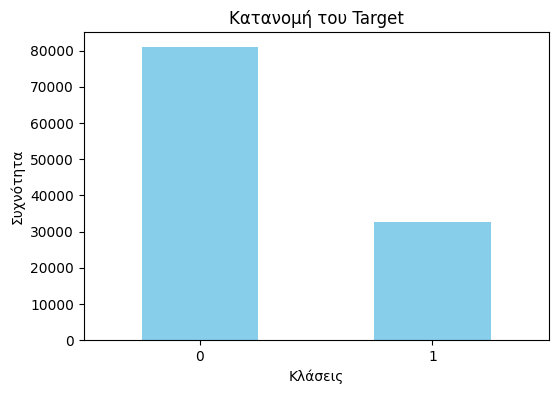

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("bankloan_with_target.csv")
target_counts = df['Target'].value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Κατανομή του Target')
plt.xlabel('Κλάσεις')
plt.ylabel('Συχνότητα')
plt.xticks(rotation=0)
plt.show()

Αφαίρεση χαρακτηριστικών 'grade', 'sub_grade' αφου δημιουργήσαμε το Target

In [ ]:
cols_to_drop = ['grade', 'sub_grade']

df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df_clean.to_csv("bankloan_with_target.csv", index=False)

df = pd.read_csv("bankloan_with_target.csv")
df.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,36months,60months,Target
0,20000,0,12.29,667.06,801,0,2,65000.0,1,2,...,1,0.0,0,0.0,0.0,52303.0,41000.0,1.0,0.0,0
1,11000,0,12.69,369.00,890,7,1,40000.0,1,2,...,1,0.0,0,0.0,332.0,175731.0,13100.0,1.0,0.0,0
2,7000,0,9.99,225.84,20872,6,1,32000.0,1,2,...,0,0.0,0,0.0,0.0,202012.0,16300.0,1.0,0.0,0
3,10000,0,10.99,327.34,29483,1,1,48000.0,1,1,...,0,0.0,0,0.0,0.0,108235.0,34750.0,1.0,0.0,0
4,9550,0,19.99,354.87,32855,1,3,32376.0,2,2,...,1,0.0,0,0.0,0.0,45492.0,14100.0,1.0,0.0,0


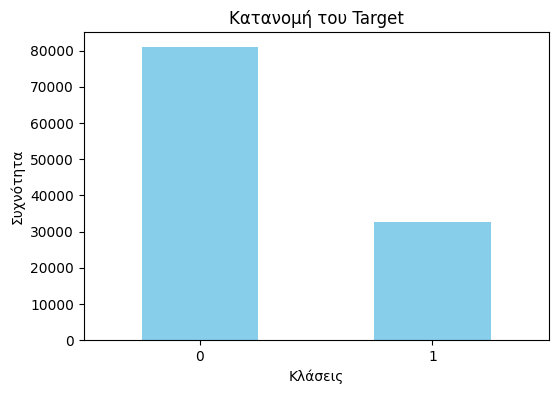

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("bankloan_with_target.csv")
target_counts = df['Target'].value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Κατανομή του Target')
plt.xlabel('Κλάσεις')
plt.ylabel('Συχνότητα')
plt.xticks(rotation=0)
plt.show()

5. Υπάρχει κάποιο αιτούμενο εύρος ποσού (πχ από 20000-25000) (loan_amnt) το οποίο να γίνει δεκτό για δανειοδότηση με πιθανότητα τουλάχιστον 15% από αυτούς που το αιτούνται? Αν Ναι, να βρείτε και να αναφέρετε με κατάλληλο τρόπο ένα τέτοιο εύρος.

Εφόσον η συνολική μέση πιθανότητα να ανήκει κάποιος στις κατηγορίες Α, Β1, Β2 είναι 27,7%, αυτό σημαίνει ότι υπάρχει τέτοιο εύρος.

Συγκεκριμένα, το εύρος [1.000 - 35.000] δηλαδή ολόκληρο το εύρος των αιτούμενων ποσών  έχει πιθανότητα αποδοχής περίπου 27,7%, η οποία υπερβαίνει το ζητούμενο όριο του 15%.

# Ερώτημα 3 (Classification)

Η μέθοδος κανονικοποίησης που επιλέχθηκε είναι ο StandardScaler (Z-score normalization), επειδή αποτελεί την πιο κατάλληλη τεχνική για δεδομένα όπως αυτά του δανεισμού, όπου οι αριθμητικές μεταβλητές έχουν πολύ διαφορετικές κλίμακες τιμών. Με το StandardScaler κάθε χαρακτηριστικό μετασχηματίζεται ώστε να έχει μέση τιμή 0 και τυπική απόκλιση 1, διατηρώντας όμως τις σχετικές αποστάσεις μεταξύ των τιμών. Αυτή η ιδιότητα το καθιστά εξαιρετικά αποτελεσματικό για αλγόριθμους που βασίζονται σε αποστάσεις ή γραμμικά όρια, όπως Logistic Regression. Σε αντίθεση με το MinMaxScaler, το οποίο συμπιέζει όλα τα δεδομένα στο εύρος [0, 1] και είναι πιο ευαίσθητο σε ακραίες τιμές, ο StandardScaler εχει μεγαλύτερη σταθερότητα και πιο ρεαλιστική κανονικοποίηση για datasets με οικονομικές μεταβλητές. Έτσι εξασφαλίζεται ότι όλες οι μεταβλητές συμμετέχουν ισότιμα στη διαδικασία εκπαίδευσης του μοντέλου χωρίς να κυριαρχούν αυτές με τη μεγαλύτερη κλίμακα.

In [ ]:
df = pd.read_csv("bankloan_with_target.csv")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Target"]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.to_csv("bankloan_normalized.csv", index=False)

df.head()


,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,36months,60months,Target
0,0.569995,-0.69198,-0.001172,0.941181,-1.790802,-1.082700,0.104783,-0.145663,-0.061298,-0.185184,...,0.612683,-0.133836,-0.062385,-0.072406,-0.129131,-0.565602,0.186084,0.041225,-0.041225,0
1,-0.474748,-0.69198,0.094134,-0.271463,-1.783249,1.108854,-0.961565,-0.418549,-0.061298,-0.185184,...,0.612683,-0.133836,-0.062385,-0.072406,0.033589,0.217008,-0.612762,0.041225,-0.041225,0
2,-0.939078,-0.69198,-0.549182,-0.853903,-0.087642,0.795775,-0.961565,-0.505872,-0.061298,-0.185184,...,-1.632165,-0.133836,-0.062385,-0.072406,-0.129131,0.383646,-0.521138,0.041225,-0.041225,0
3,-0.590830,-0.69198,-0.310917,-0.440954,0.643059,-0.769620,-0.961565,-0.331225,-0.061298,-0.719653,...,-1.632165,-0.133836,-0.062385,-0.072406,-0.129131,-0.210958,0.007131,0.041225,-0.041225,0
4,-0.643067,-0.69198,1.833468,-0.328950,0.929196,-0.769620,1.171132,-0.501768,1.249658,-0.185184,...,0.612683,-0.133836,-0.062385,-0.072406,-0.129131,-0.608788,-0.584130,0.041225,-0.041225,0


Διαχωρισμός του dataset σε train, test sets σε (70-30)

In [ ]:
df = pd.read_csv("bankloan_normalized.csv")

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Target
 0    0.712049
 1    0.287951
 Name: proportion, dtype: float64,
 Target
 0    0.712046
 1    0.287954
 Name: proportion, dtype: float64)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (79628, 29)
X_test shape: (34127, 29)
y_train shape: (79628,)
y_test shape: (34127,)


Εφαρμογή Logistic Regression κατάλληλο για την πρόβλεψη της δανειοδότησης ενός υποψηφίου.

In [ ]:
clf = LogisticRegression(max_iter=1000, solver="liblinear")

param_grid = {"C": [0.01, 0.1, 1.0, 10.0]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)
print("Best C parameter:", grid_search.best_params_)
print("\nClassification report on test set:\n")
print(classification_report(y_test, y_pred))



Best C parameter: {'C': 10.0}

Classification report on test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24300
           1       1.00      1.00      1.00      9827

    accuracy                           1.00     34127
   macro avg       1.00      1.00      1.00     34127
weighted avg       1.00      1.00      1.00     34127



 Ακρίβεια, F1, Precision, Recall για το καλύτερο μοντέλο του validation set

In [ ]:
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Αποτελέσματα του καλύτερου μοντέλου στο test set:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

Αποτελέσματα του καλύτερου μοντέλου στο test set:
Accuracy:  0.9999
F1-score:  0.9998
Precision: 0.9997
Recall:    1.0000


Στην εφαρμογή πρόβλεψης χορήγησης δανείων, η πιο σημαντική μετρική είναι η ανακλητικότητα (Recall), καθώς αντικατοπτρίζει το ποσοστό των πραγματικά καλών υποψηφίων που εντοπίζονται σωστά από το μοντέλο. Χαμηλό recall σημαίνει ότι η τράπεζα θα χάσει αξιόπιστους υποψήφιους δανειολήπτες. Η precision (ακρίβεια) είναι επίσης χρήσιμη, καθώς δείχνει πόσο συχνά οι υποψήφιοι που προβλέπονται ως καλοί είναι πράγματι αξιόπιστοι, αλλά είναι λιγότερο κρίσιμη από το recall σε αυτή την περίπτωση. Η F1-score, που συνδυάζει precision και recall, παρέχει μια ισορροπημένη εικόνα της απόδοσης του μοντέλου και είναι χρήσιμη όταν θέλουμε να λάβουμε υπόψη και τις δύο μετρικές. Η accuracy (ακρίβεια) είναι λιγότερο σημαντική, ειδικά σε datasets με ανισορροπία κλάσεων. Συνεπώς, για την πρόβλεψη χορήγησης δανείων, η κύρια προσοχή πρέπει να δοθεί στο recall, ενώ η F1-score και η precision χρησιμοποιούνται συμπληρωματικά για καλύτερη αξιολόγηση και τελευταία ειναι η accuracy.

# Ερώτημα 4 (Feature Importance & Selection)

Εκπαιδευση ταξινομητή Random Forest

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_clf.feature_importances_
})

top15_features = feature_importances.sort_values(by='importance', ascending=False).head(15)

print("Τα 15 σημαντικότερα χαρακτηριστικά για την πρόβλεψη δανειοδότησης:")
print(top15_features)


Τα 15 σημαντικότερα χαρακτηριστικά για την πρόβλεψη δανειοδότησης:
                feature  importance
2              int_rate    0.790349
1                  term    0.048687
26     total_rev_hi_lim    0.024929
8   verification_status    0.023275
18           revol_util    0.015915
3           installment    0.012414
11                  dti    0.010137
14       inq_last_6mths    0.010063
9               purpose    0.009791
7            annual_inc    0.009174
0             loan_amnt    0.008342
10                title    0.005964
17            revol_bal    0.005337
13     earliest_cr_line    0.005146
25          tot_cur_bal    0.004461


Correlation matrix για τα 15  χαρακτηριστικά

Correlation matrix για τα 15 σημαντικότερα χαρακτηριστικά:
                     int_rate      term  total_rev_hi_lim  \
int_rate             1.000000  0.450027         -0.205898   
term                 0.450027  1.000000          0.070036   
total_rev_hi_lim    -0.205898  0.070036          1.000000   
verification_status  0.278600 -0.053440         -0.085294   
revol_util           0.199915  0.091091         -0.111997   
installment          0.121432  0.130499          0.332489   
dti                  0.038648  0.018124          0.011592   
inq_last_6mths       0.237252  0.002819          0.009709   
purpose              0.160756 -0.069345         -0.074393   
annual_inc          -0.082604  0.039879          0.256573   
loan_amnt            0.147469  0.406134          0.362334   
title                0.110096 -0.071254         -0.072239   
revol_bal           -0.065319  0.089931          0.841819   
earliest_cr_line    -0.101732  0.032317          0.181182   
tot_cur_bal         -0.087

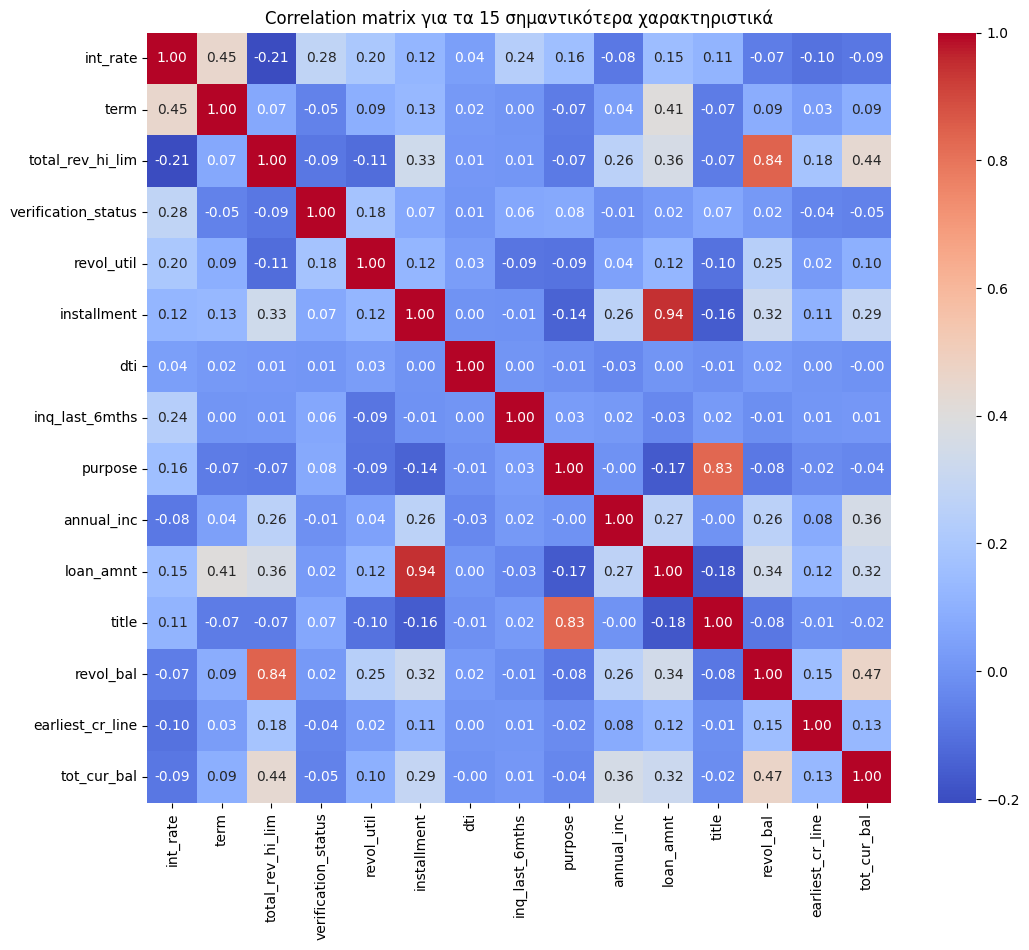

In [ ]:
top15_cols = [
    'int_rate', 'term', 'total_rev_hi_lim', 'verification_status', 'revol_util',
    'installment', 'dti', 'inq_last_6mths', 'purpose', 'annual_inc',
    'loan_amnt', 'title', 'revol_bal', 'earliest_cr_line', 'tot_cur_bal'
]

corr_matrix = X_train[top15_cols].corr()

print("Correlation matrix για τα 15 σημαντικότερα χαρακτηριστικά:")
print(corr_matrix)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix για τα 15 σημαντικότερα χαρακτηριστικά")
plt.show()



Από την ανάλυση του correlation matrix για τα 15 σημαντικότερα χαρακτηριστικά που προέκυψαν από το Random Forest, παρατηρούμε ότι ορισμένα ζευγάρια μεταβλητών εμφανίζουν μέτρια συσχέτιση μεταξύ τους. Για παράδειγμα, τα χαρακτηριστικά loan_amnt και installment παρουσιάζουν σχετικά υψηλή συσχέτιση, κάτι που είναι λογικό αφού το ύψος του δανείου επηρεάζει άμεσα το ποσό της μηνιαίας δόσης. Επίσης, μεταβλητές όπως revol_bal και revol_util εμφανίζουν μέτρια συσχέτιση, καθώς σχετίζονται με τη χρήση και το υπόλοιπο του revolving credit. Παρόμοια, τα tot_cur_bal και total_rev_hi_lim συνδέονται λογικά μεταξύ τους λόγω της σχέσης τους με τα συνολικά πιστωτικά όρια. Ωστόσο, πέρα από αυτές τις μεμονωμένες περιπτώσεις, η πλειονότητα των χαρακτηριστικών παρουσιάζει χαμηλή ή πολύ χαμηλή συσχέτιση, υποδεικνύοντας ότι δεν υπάρχει έντονη γραμμική εξάρτηση μεταξύ τους. Αυτό σημαίνει ότι τα επιλεγμένα χαρακτηριστικά δεν είναι πλεονάζοντα ούτε προκαλούν προβλήματα multicollinearity. Αρα, παρότι υπάρχουν ορισμένες λογικές συσχετίσεις, η συνολική εικόνα δείχνει ότι τα χαρακτηριστικά είναι σε μεγάλο βαθμό ανεξάρτητα μεταξύ τους και ετσι ο Random Forest μπορει να τα χρησιμοποιήσει αποτελεσματικά.

Χαρακτηριστικά που να έχουν χαμηλό correlation μεταξύ τους

In [ ]:
selected_features = [
    'int_rate',
    'term',
    'total_rev_hi_lim',
    'verification_status',
    'revol_util',
    'dti',
    'inq_last_6mths',
    'purpose',
    'annual_inc',
    'loan_amnt',
    'title',
    'earliest_cr_line'
]


Επανεκπαίδευση του Random Forest Classifier

In [ ]:

X_train_lowcorr = X_train[selected_features]
X_test_lowcorr  = X_test[selected_features]

rf_clf_lowcorr = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_clf_lowcorr.fit(X_train_lowcorr, y_train)

feature_importances_lowcorr = pd.DataFrame({
    'feature': X_train_lowcorr.columns,
    'importance': rf_clf_lowcorr.feature_importances_
}).sort_values(by='importance', ascending=False)

top15_lowcorr = feature_importances_lowcorr.head(15)

print("Σημαντικότερα χαρακτηριστικά με βάση το χαμηλό correlation set:")
print(top15_lowcorr)


Σημαντικότερα χαρακτηριστικά με βάση το χαμηλό correlation set:
                feature  importance
0              int_rate    0.863415
1                  term    0.045204
3   verification_status    0.020946
2      total_rev_hi_lim    0.019307
4            revol_util    0.011129
7               purpose    0.008319
6        inq_last_6mths    0.007562
8            annual_inc    0.007003
5                   dti    0.005934
9             loan_amnt    0.004157
10                title    0.003542
11     earliest_cr_line    0.003483


# Ερώτημα 5 (Dimensionality Reduction)

1. Εισαγωγή Δεδομένων του dataset των ασπρόμαυρων ψηφίων MNIST



In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train images:", x_train.shape)
print("Test images:", x_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


2. Εφαρμογή της μεθοδου Standard Scaling στα δεδομένα


In [ ]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat  = x_test.reshape((x_test.shape[0], -1))

print("Flattened shape:", x_train_flat.shape, x_test_flat.shape)


Flattened shape: (60000, 784) (10000, 784)


In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_flat)

x_test_scaled = scaler.transform(x_test_flat)


3. Εφαρμογή PCA για μειωση των χαρακτηριστικων σε 300

In [ ]:
pca = PCA(n_components=300)

x_train_pca = pca.fit_transform(x_train_scaled)

x_test_pca = pca.transform(x_test_scaled)

print("Train PCA shape:", x_train_pca.shape)
print("Test PCA shape:", x_test_pca.shape)


Train PCA shape: (60000, 300)
Test PCA shape: (10000, 300)


Εκπαίδευση KNN για τα k = 5, 15, 51, 101

In [ ]:
ks = [5, 15, 51, 101]
accuracies = {}

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train)

    y_pred = knn.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"k = {k} → accuracy = {acc:.4f}")


k = 5 → accuracy = 0.9497
k = 15 → accuracy = 0.9436
k = 51 → accuracy = 0.9273
k = 101 → accuracy = 0.9158


Παρατηρώ οτι η ακρίβεια του ταξινομητή όσο το k μεγαλώνει αυτή μειώνεται

Επίσης για τη μείωση των διαστάσεων εφαρμόστηκε PCA με 300 components. Το PCA εκπαιδεύτηκε μόνο πάνω στα δεδομένα του training set με τη συνάρτηση fit_transform, ενώ στα δεδομένα του test set εφαρμόστηκε μόνο η συνάρτηση transform. Αν το PCA γινόταν fit και στο test set, τότε το μοντέλο θα χρησιμοποιούσε πληροφορία από το test πριν την αξιολόγηση, οδηγώντας σε data leakage και λανθασμένα υψηλή ακρίβεια. Αν το PCA γινόταν ξεχωριστά σε train και test, οι δύο μετασχηματισμοί θα δημιουργούσαν διαφορετικούς χώρους χαρακτηριστικών, με αποτέλεσμα το μοντέλο να μην μπορεί να συγκρίνει σωστά τα σημεία του test set με αυτά του train. Συνεπώς, η σωστή διαδικασία είναι να εφαρμόζουμε pca.fit_transform μόνο στο training set και pca.transform στο test set.

4. LDA με 2 components

In [ ]:
lda = LDA(n_components=2)

x_train_lda = lda.fit_transform(x_train_scaled, y_train)

x_test_lda = lda.transform(x_test_scaled)

print("Train LDA shape:", x_train_lda.shape)
print("Test LDA shape:", x_test_lda.shape)


Train LDA shape: (60000, 2)
Test LDA shape: (10000, 2)


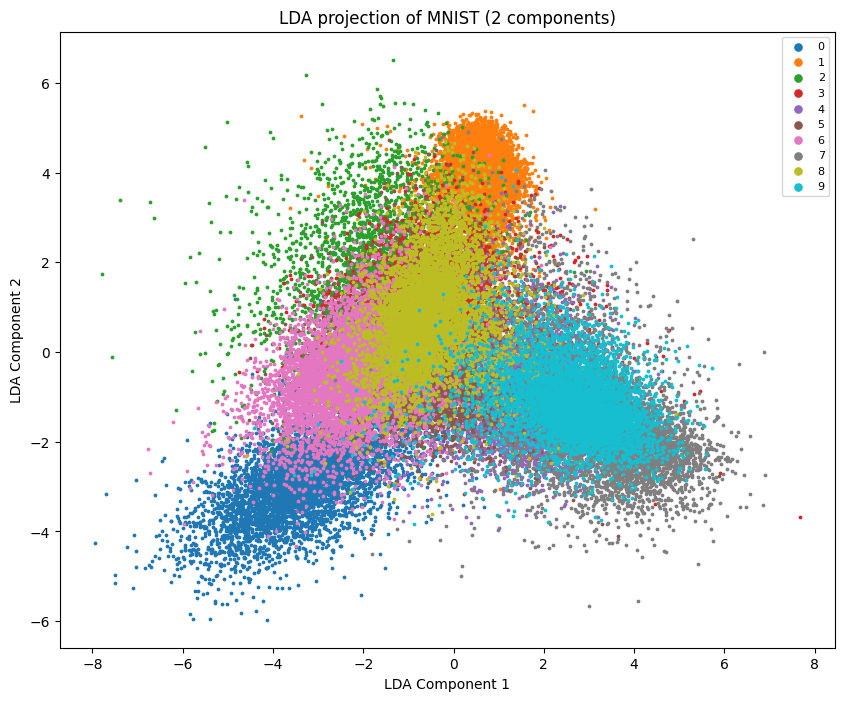

In [ ]:
plt.figure(figsize=(10,8))

for digit in range(10):
    idx = np.where(y_train == digit)
    plt.scatter(x_train_lda[idx, 0], x_train_lda[idx, 1], s=3, label=str(digit))

plt.title("LDA projection of MNIST (2 components)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(markerscale=3, fontsize=8)
plt.show()


Η προβολή του MNIST σε δύο διαστάσεις μέσω LDA δημιουργεί ένα σχήμα, όπου κάθε ομάδα ψηφίων συγκεντρώνεται σε μια περιοχή του επιπέδου. Κάποια ψηφία, όπως τα 0, 1, 6, 7 και 9, σχηματίζουν σχετικά καθαρά clusters, ενώ άλλα, όπως τα 3, 5 και 8, παρουσιάζουν επικάλυψη πιθανά λογω της ομοιότητας τους. Η LDA καταφέρνει να εντοπίσει κατευθύνσεις για τον διαχωρισμό των κλάσεων, αλλά ο πλήρης διαχωρισμός δεν είναι εφικτός μόνο σε δύο διαστάσεις.

5. Επαναληψη της LDA χρησιμοποιώντας τη βιβλιοθήκη umap

In [ ]:
umap_model = umap.UMAP(n_components=2, random_state=42)

x_train_umap = umap_model.fit_transform(x_train_scaled)
x_test_umap = umap_model.transform(x_test_scaled)

print("UMAP train shape:", x_train_umap.shape)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP train shape: (60000, 2)


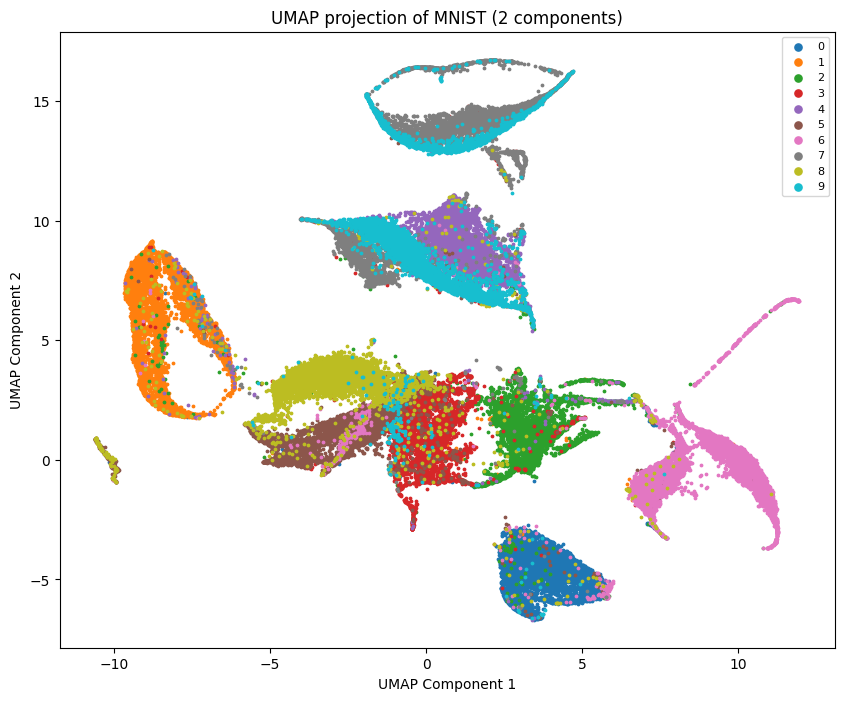

In [ ]:
plt.figure(figsize=(10,8))

for digit in range(10):
    idx = np.where(y_train == digit)
    plt.scatter(x_train_umap[idx, 0], x_train_umap[idx, 1], s=3, label=str(digit))

plt.title("UMAP projection of MNIST (2 components)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(markerscale=3, fontsize=8)
plt.show()


Το αποτέλεσμα του UMAP είναι πολύ πιο καθαρό και διαχωρισμένο σε σχέση με το LDA. Ενώ το LDA δημιουργεί έναν πιο “συμπιεσμένο” τριγωνικό χώρο όπου πολλές κατηγορίες επικαλύπτονται μεταξύ τους, το UMAP σχηματίζει καλά διαχωρισμένα clusters, το καθένα με πιο σαφή και ευδιάκριτη μορφή. Βλέπουμε ότι πολλά ψηφία, όπως τα 0, 1, 2, 7 και 9, βρίσκονται σε ξεχωριστές περιοχές με πολύ μικρή επικάλυψη, ενώ ακόμη και οι πιο δύσκολες κατηγορίες όπως 3, 5 και 8 έχουν πιο ευδιακριτη ομαδοποίηση σε σχέση με πριν. Αυτό συμβαίνει επειδή το UMAP είναι μη γραμμική μέθοδος και μπορεί να αποτυπώσει καλύτερα την πολύπλοκη δομή των χειρόγραφων ψηφίων. Συμπερασματικα, το UMAP προσφέρει έναν πολύ πιο ευδιάκριτο διαχωρισμό των ψηφίων σε 2 διαστάσεις σε σύγκριση με το LDA.